In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class LinearRegression:

    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit_normal(self, X_train, y_train):
        """根据训练数据集X_train, y_train训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, x_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(x_test)
#         #testY是一维数组，predicY是二维数组，故需要将testY转换一下
#         MSE=np.sum(np.power((y_test.reshape(-1,1) - y_predict),2))/len(y_test)
#         R2=1-MSE/np.var(y_test)
#         print("MSE:",MSE)
#         print("R2:", R2)
#         print("MSE2:", MSE2)
        error = []
        for i in range(len(y_test)):
            error.append(y_test[i] - y_predict[i])
        squaredError = []
        for val in error:
            squaredError.append(val * val)#target-prediction之差平方 
        MSE = sum(squaredError) / len(squaredError)#均方误差MSE
        return MSE

    def __repr__(self):
        return "LinearRegression()"



def train_test_split(X, y, train_size=None ,seed=None):
    """将数据 X 和 y 按照test_ratio分割成X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

#     test_size = int(450)
    test_indexes = shuffled_indexes[train_size:]
    train_indexes = shuffled_indexes[:train_size]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [53]:
#导入数据并给每一维属性命名
import pandas as pd
df = pd.read_csv("./housing_data.txt",sep='\s+',encoding='utf-8',header=None,
                 )
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [54]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT',]


x = df[cols].values
y = df['MEDV'].values
print(x.shape)
print(y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=450,seed=1)

# from LinearRegression import LinearRegression

print("训练数据集",x_train.shape,y_train.shape)
print("测试数据集",x_test.shape,y_test.shape)

reg = LinearRegression()
reg.fit_normal(x_train,y_train)
print("系数矩阵",reg.coef_)
print("偏置项",reg.intercept_)

y_predict=reg.predict(x_test)
print("测试集 MSE 误差",reg.score(x_test,y_test))

(506, 13)
(506,)
训练数据集 (450, 13) (450,)
测试数据集 (56, 13) (56,)
系数矩阵 [-1.08684129e-01  4.29542131e-02  1.48275276e-02  2.65705584e+00
 -1.76065672e+01  3.86310197e+00  2.98983255e-03 -1.47064246e+00
  3.46067962e-01 -1.30853206e-02 -9.48553133e-01  9.84568773e-03
 -5.51625793e-01]
偏置项 36.012020400790796
测试集 MSE 误差 13.435389469688502


/Users/Macbook/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


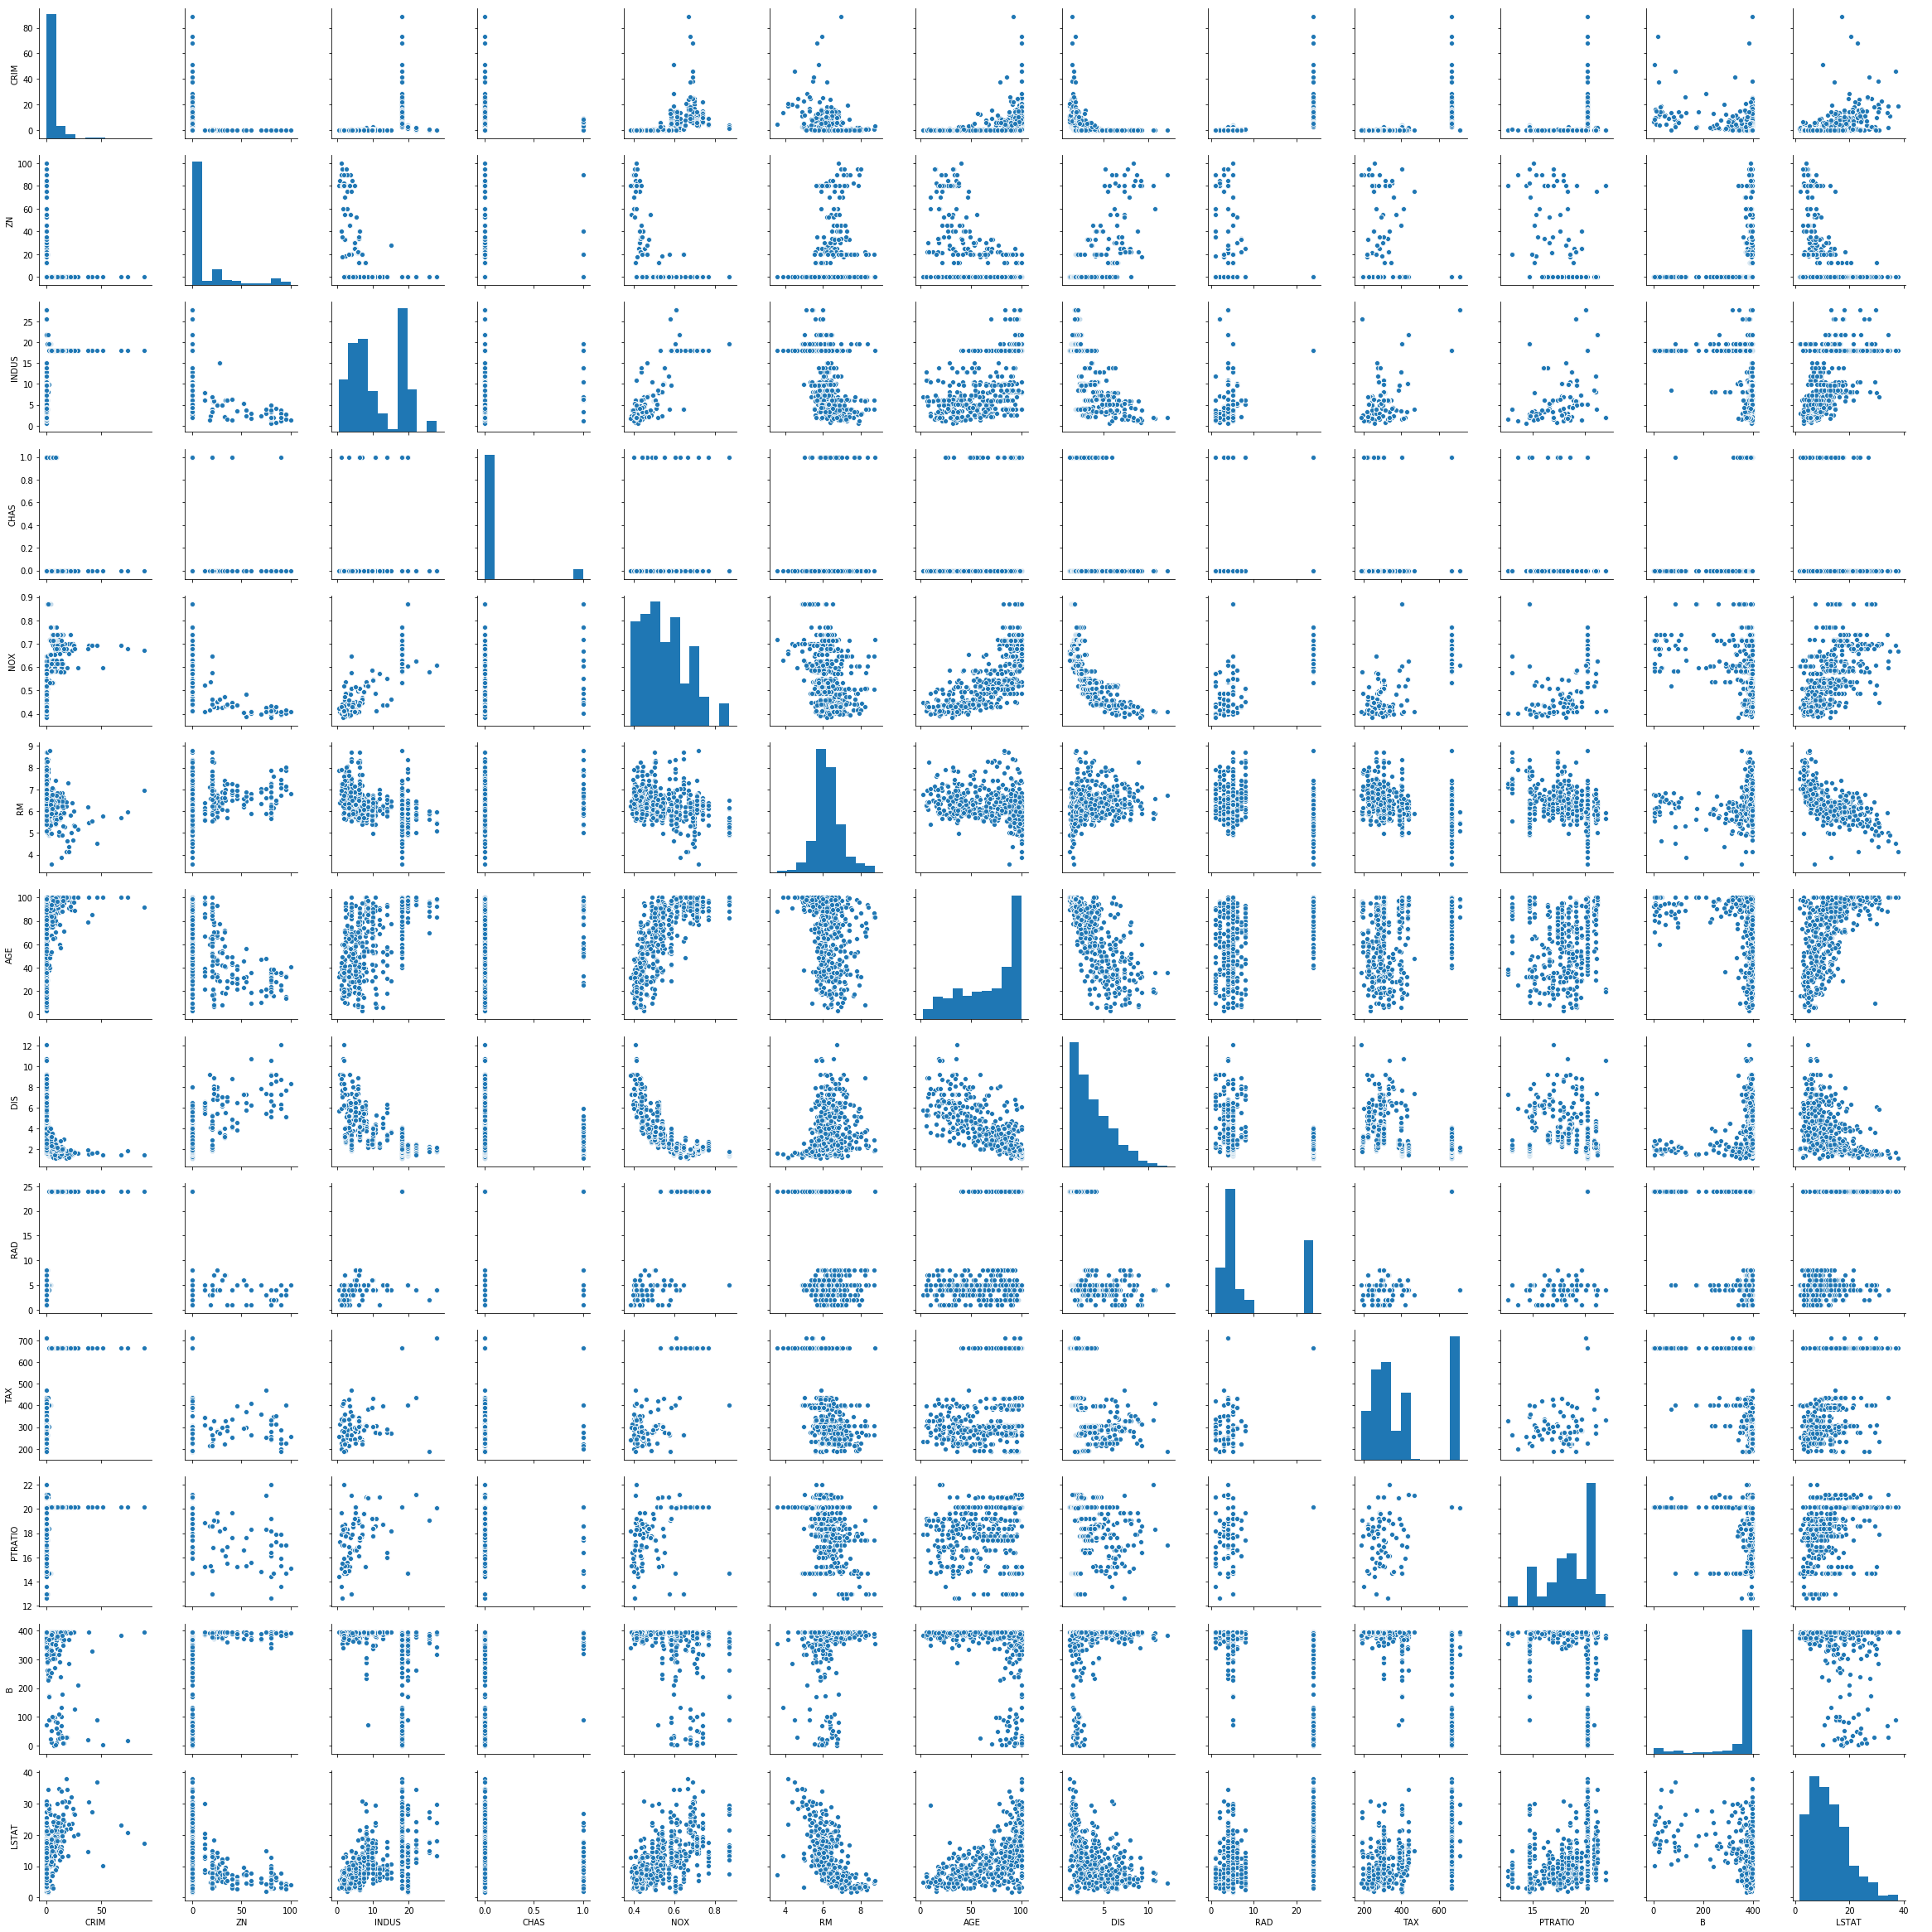

In [55]:

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT',]

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

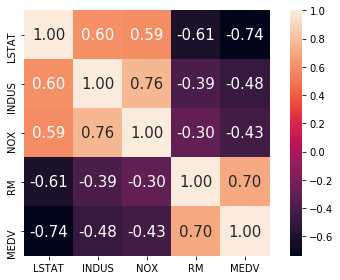

In [9]:

import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()